# Ceneo Analyzer

### Bilbioteki

In [28]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

### Lista kodów produktów o których zostały pobrane opinie

In [29]:
print(*[filename.split(".")[0] for filename in os.listdir("opinions")], sep = "\n")

114700014


### Kod produktu, którego opinie mają zostać przeanalizowane

In [30]:
product_id = input("Proszę podać kod produktu z serwisu CeneoPL")

#### Wczytanie do obiektu terminal source .venv/Scripts/activate --> pip install pandas

### Wczytanie do obiektu pandas.DataFrame opinii o wskazanym produkcie

In [31]:
opinions = pd.read_json(f'opinions/{product_id}.json')
opinions.rating = opinions.rating.apply(lambda r: r.split("/")[0].replace(",","."),).astype(float)
opinions.recommendation = opinions.recommendation.apply(lambda r: "Brak rekomendacji" if r is None else r)

In [32]:
opinions

,opinion_id,author,recommendation,rating,content,pros,cons,useful,useless,post_date,purchase_date
0,18616837,i...d,Polecam,5.0,Bardzo długo zastanawiałam się nad wyborem mię...,"[dużo końcówek, lekki, poręczny, przycisk zasi...",[],1,0,2024-05-01 09:19:31,2024-04-15 11:45:49
1,18536064,A...t,Polecam,5.0,"Długo szukałam, sporo filmików na YT o ujrzała...",[],[],0,0,2024-03-29 11:14:23,2024-03-17 13:45:25
2,17516357,g...a,Polecam,5.0,"Fantastyczny sprzęt, bardzo mocny, lekki i odp...","[dużo końcówek, poręczny, przycisk zasilania, ...",[],0,2,2023-05-17 10:52:54,2023-05-12 09:57:19
3,18499460,j...k,Polecam,4.0,Odkurzacz spełnia wymagania,"[dużo końcówek, poręczny, przycisk zasilania, ...",[],1,0,2024-03-18 08:42:26,2024-03-10 15:49:13
4,18457506,n...2,Polecam,5.0,Produkt super,"[dużo końcówek, lekki, poręczny, przycisk zasi...",[],0,0,2024-03-04 08:34:36,2024-02-17 16:31:32
...,...,...,...,...,...,...,...,...,...,...,...
186,17545591,J...2,Polecam,5.0,Ok,[],[],0,0,2023-05-25 07:24:58,2023-05-07 16:04:38
187,17448760,b...r,Polecam,5.0,ok,"[dużo końcówek, lekki, poręczny, przycisk zasi...",[],0,0,2023-04-26 21:03:39,2023-04-23 10:00:47
188,15826211,Użytkownik Ceneo,Polecam,5.0,"Odkurzacz mały, poręczny przy tym posiada bard...","[lekki, poręczny, przycisk zasilania, wyświetl...",[],0,0,2022-03-15 20:58:40,None
189,18125745,t...l,Nie polecam,2.5,"Odkurza dobrze, niestety bardzo szybko rozłado...","[lekki, poręczny, przycisk zasilania, wyświetl...",[wytrzymała bateria],0,0,2023-11-22 12:40:45,2023-11-10 10:24:44


In [33]:
opinions_count = opinions.index.size
pros_count = opinions.pros.apply(lambda p: True if p else False).sum()
cons_count = opinions.pros.apply(lambda p: True if p else False).sum()
average_rating = opinions.rating.mean()

In [34]:
opinions_count

191

In [35]:
pros_count

120

## Histogram częstości poszczególnych ocen produktu

In [36]:
rating_distribution = opinions.rating.value_counts().reindex(np.arange(0,5.5,0.5), fill_value = 0)
rating_distribution

rating
0.0      0
0.5      0
1.0      2
1.5      0
2.0      0
2.5      1
3.0      1
3.5      2
4.0     11
4.5     18
5.0    156
Name: count, dtype: int64

[Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '2'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '11'),
 Text(0, 0, '18'),
 Text(0, 0, '156')]

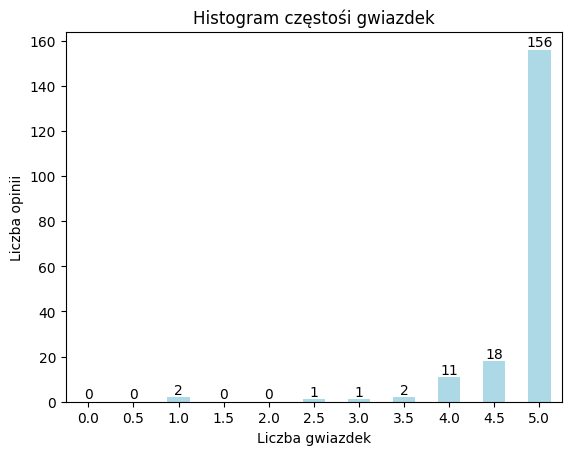

In [37]:
fig, ax = plt.subplots()
rating_distribution.plot.bar(color = 'lightblue')
plt.title("Histogram częstośi gwiazdek")
plt.xlabel("Liczba gwiazdek")
plt.ylabel("Liczba opinii")
plt.xticks(rotation=0)
plt.bar_label(ax.containers[0], label_type = "edge")

In [38]:
opinions

,opinion_id,author,recommendation,rating,content,pros,cons,useful,useless,post_date,purchase_date
0,18616837,i...d,Polecam,5.0,Bardzo długo zastanawiałam się nad wyborem mię...,"[dużo końcówek, lekki, poręczny, przycisk zasi...",[],1,0,2024-05-01 09:19:31,2024-04-15 11:45:49
1,18536064,A...t,Polecam,5.0,"Długo szukałam, sporo filmików na YT o ujrzała...",[],[],0,0,2024-03-29 11:14:23,2024-03-17 13:45:25
2,17516357,g...a,Polecam,5.0,"Fantastyczny sprzęt, bardzo mocny, lekki i odp...","[dużo końcówek, poręczny, przycisk zasilania, ...",[],0,2,2023-05-17 10:52:54,2023-05-12 09:57:19
3,18499460,j...k,Polecam,4.0,Odkurzacz spełnia wymagania,"[dużo końcówek, poręczny, przycisk zasilania, ...",[],1,0,2024-03-18 08:42:26,2024-03-10 15:49:13
4,18457506,n...2,Polecam,5.0,Produkt super,"[dużo końcówek, lekki, poręczny, przycisk zasi...",[],0,0,2024-03-04 08:34:36,2024-02-17 16:31:32
...,...,...,...,...,...,...,...,...,...,...,...
186,17545591,J...2,Polecam,5.0,Ok,[],[],0,0,2023-05-25 07:24:58,2023-05-07 16:04:38
187,17448760,b...r,Polecam,5.0,ok,"[dużo końcówek, lekki, poręczny, przycisk zasi...",[],0,0,2023-04-26 21:03:39,2023-04-23 10:00:47
188,15826211,Użytkownik Ceneo,Polecam,5.0,"Odkurzacz mały, poręczny przy tym posiada bard...","[lekki, poręczny, przycisk zasilania, wyświetl...",[],0,0,2022-03-15 20:58:40,None
189,18125745,t...l,Nie polecam,2.5,"Odkurza dobrze, niestety bardzo szybko rozłado...","[lekki, poręczny, przycisk zasilania, wyświetl...",[wytrzymała bateria],0,0,2023-11-22 12:40:45,2023-11-10 10:24:44


## Udział poszczególnych rekomandacji w opiniach

In [39]:
recommendations_distribution = opinions.recommendation.value_counts().reindex(["Polecam","Nie polecam","Brak rekomendacji"])
recommendations_distribution

recommendation
Polecam              185
Nie polecam            3
Brak rekomendacji      3
Name: count, dtype: int64

Text(0.5, 1.0, 'Udział rekomendacji w opiniach')

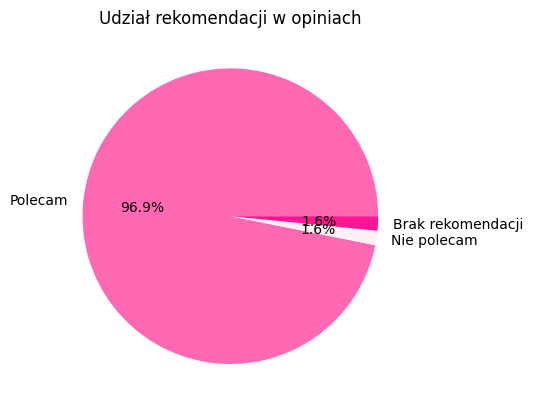

In [40]:
recommendations_distribution.plot.pie(
    colors = ["hotpink", "lavenderblush", "deeppink"],
    autopct = "%1.1f%%",
    label = ''
)
plt.title("Udział rekomendacji w opiniach")